Here we employ python libraries to implement a minimal version of parameter estimation with the adaptive model

In [6]:
import numpy as np
from CRM.param_estimation_test import AdaptiveMetabolicEstimator 
import pandas as pd
import matplotlib.pyplot as plt


Stopping search: maximum iterations reached --> 100


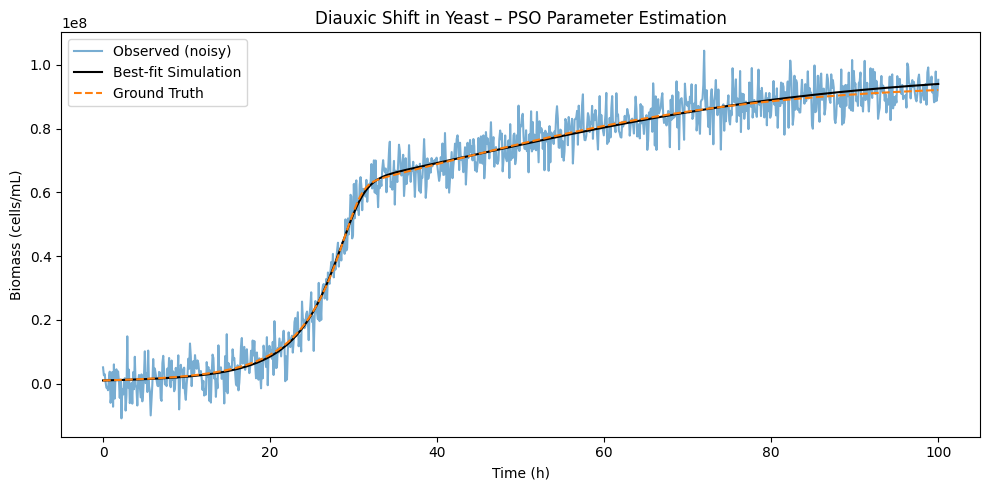

In [7]:
# Synthetic observed data mimicking a diauxic shift
t = np.linspace(0, 100, 1000)
true_params = [1.2e10, 1.25e10, 1e-3, 9.67e-3, 0.53, 2.18e-5, 2.15e-6, 2e-6]

# Initial conditions: [n0, c_gal, c_eth, a_gal, a_eth]
initial_conditions = [
    1e6,        # initial biomass
    5e-3,       # galactose concentration
    0.0,        # ethanol concentration
    0.7e-11,    # initial galactose strategy
    3.75e-12    # initial ethanol strategy
]  

simulator = AdaptiveMetabolicEstimator(t, None, initial_conditions)
n_true = simulator.simulate(true_params)
observed_data = n_true + np.random.normal(0, 0.05 * n_true.max(), size=n_true.shape)  # add noise

# Now estimate parameters from observed_data
simulator.observed_data = observed_data
bounds = [
    (1e9, 2e10),  # v_gal
    (1e9, 2e10),  # v_eth
    (1e-4, 1e-2), # K_gal
    (1e-3, 1e-1), # K_eth
    (0.4, 0.7),   # Y
    (1e-6, 1e-4), # Q
    (1e-7, 1e-5), # delta
    (1e-7, 1e-5)  # d
]

best_params, best_error = simulator.fit_pso(bounds)

# Simulate best-fit model
n_fit = simulator.simulate(best_params)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(t, observed_data, label="Observed (noisy)", alpha=0.6)
plt.plot(t, n_fit, label="Best-fit Simulation", color='black')
plt.plot(t, n_true, label="Ground Truth", linestyle='dashed')
plt.xlabel("Time (h)")
plt.ylabel("Biomass (cells/mL)")
plt.title("Diauxic Shift in Yeast – PSO Parameter Estimation")
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
file_path = '/Users/edwin/Downloads/yeast_growth_data.csv'  # Replace with your file path
yeast_data = pd.read_csv(file_path)
yeast_data_cleaned = yeast_data[["Time", "MeanDensity"]].iloc[1:]

# Extract time and density data
time_data = yeast_data_cleaned["Time"].values
density_data = yeast_data_cleaned["MeanDensity"].values

# Convert data to numeric for modeling
yeast_data_cleaned["Time"] = pd.to_numeric(yeast_data_cleaned["Time"], errors="coerce")
yeast_data_cleaned["MeanDensity"] = pd.to_numeric(yeast_data_cleaned["MeanDensity"], errors="coerce")
yeast_data_cleaned = yeast_data_cleaned.dropna()

# Extract relevant columns
time = yeast_data['Time']
mean_density = yeast_data['MeanDensity']
std_dev = yeast_data['Standard deviation']

# Set initial conditions (based on biological intuition)
initial_conditions = [
    mean_density[0],  # n0: initial population from data
    5.0e-3,  # c_gal_0: initial galactose (assumed)
    0.0,  # c_eth_0: ethanol starts at zero
    0.7e-11,  # a_gal_0: initial galactose strategy
    3.75e-12  # a_eth_0: initial ethanol strategy
]

# Create the estimator object
estimator = AdaptiveMetabolicEstimator(t=time, observed_data=mean_density, initial_conditions=initial_conditions)

# Define parameter bounds (8 parameters)
bounds = [
    (1e9, 2e10),  # v_gal
    (1e9, 2e10),  # v_eth
    (1e-4, 1e-2), # K_gal
    (1e-3, 1e-1), # K_eth
    (0.4, 0.7),   # Y
    (1e-6, 1e-4), # Q
    (1e-7, 1e-5), # delta
    (1e-7, 1e-5)  # d
]


estimator = AdaptiveMetabolicEstimator(
    t=time,
    observed_data=mean_density,
    initial_conditions=initial_conditions
)


bounds = [
    (1, 2e12),  # v_gal
    (1, 2e12),  # v_eth
    (1e-4, 1e-2),  # K_gal
    (1e-3, 1e-1),  # K_eth
    (0.4, 0.7),  # Y
    (1e-6, 1e-4),  # Q
    (1e-7, 1e-5),  # delta
    (1e-7, 1e-5)  # d
]

 The best solution found:                                                                           
 [3.07624001e+10 1.00508245e+09 5.00014853e-03 8.77991700e-02
 4.36919115e-01 8.19791575e-05 1.98497439e-07 6.85706881e-07]

 Objective function:
 1861331751639964.8


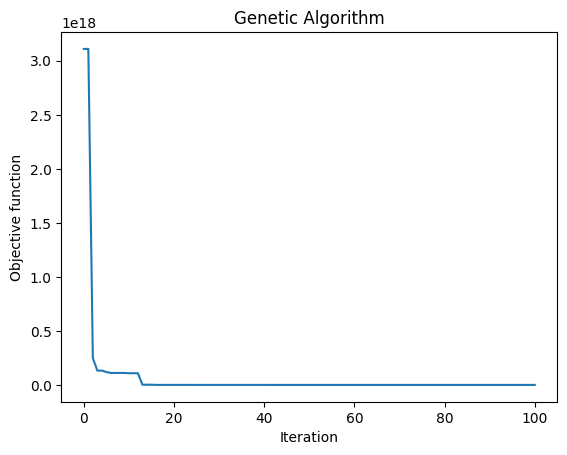

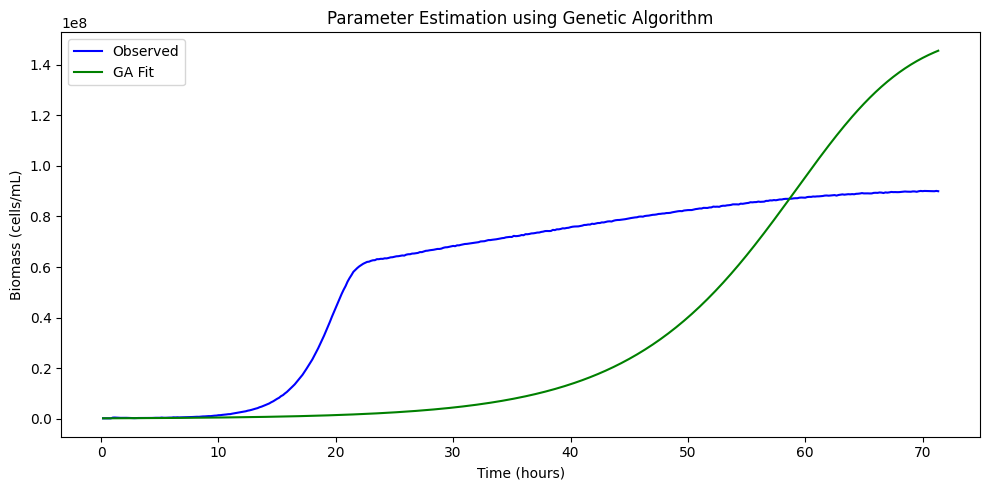

In [9]:
best_params, best_error = estimator.fit_ga(bounds)
fitted_n = estimator.simulate(best_params)

plt.figure(figsize=(10, 5))
plt.plot(time, mean_density, label="Observed", color='blue')
plt.plot(time, fitted_n, label="GA Fit", color='green')
plt.xlabel("Time (hours)")
plt.ylabel("Biomass (cells/mL)")
plt.title("Parameter Estimation using Genetic Algorithm")
plt.legend()
plt.tight_layout()
plt.show()